In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import scipy.integrate as integrate
import scipy.optimize as sp

## Examen 3
1) Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 





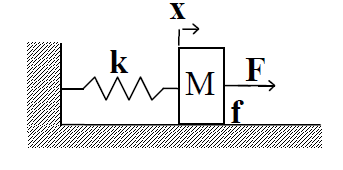

Se tiene que para un sistema masa resorte la fuerza esta dada por:

$$F=-kx$$

Siguiendo la segunda ley de Newton, se tiene que

$$F=ma=m\frac{dx}{dt}$$

Por lo tanto la ecuación diferencial nos queda

$$m \ddot{x} = -kx$$

la velocidad esta dada por
$$\frac{dx}{dt}=v$$

por lo tanto

\begin{equation} \tag{1}
\ddot{x} = \frac{dv}{dt}= -\frac{k}{m}x
\end{equation}

In [4]:
#Se define la función para la ecuación diferencial

m = 0.2 #kg
k = 1 #N/m

def dU_dt(U,t):
    dx_dt = U[1]
    dv_dt = -k/m*U[0] # Se define la EDO (1)
    return [dx_dt, dv_dt]

In [5]:
#Para variar las condiciones iniciales
n=100
X0 = np.random.uniform(-5, 5, 100)
V0 = np.random.uniform(-5, 5, 100)

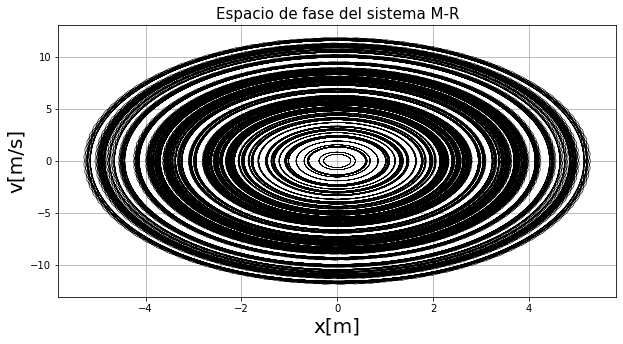

In [15]:
a=0
plt.figure(figsize=(10,5))
for x0,v0 in zip(X0,V0):
    t=np.linspace(0,100,600)
    U0=[x0,v0]
    Sol_dU=integrate.odeint(dU_dt,U0,t) #Solución de la EDO
    plt.plot(Sol_dU[:,0], Sol_dU[:,1], lw=0.1,color= 'black')
    if a==150:
        break
    a=a+1

#Se procede a graficar

plt.title("Espacio de fase del sistema M-R",fontsize=15)
plt.xlabel("x[m]", fontsize=20)
plt.ylabel("v[m/s]",fontsize=20)
plt.grid()
plt.show()

# 2)
Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

## Solución (a)

In [18]:
#Se lee el archivo
df= pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json")
df

,t,N(t)
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,99,101


In [72]:
#Procedemos a definir la función del decaimiento radioactivo

def N(t,λ):
    N0=1000
    N = N0*np.exp(-λ*t)
    return N

In [75]:
#Se realiza el fit
λ , Δλ=sp.curve_fit(N,df['t'],df['N(t)'])

#Se saca el error estandar a Δλ
σ=np.sqrt(np.diag(Δλ))

print(f"Constante de decaimiento la cual esta dada por λ = [{λ} ± {σ[0]}]")

Constante de decaimiento la cual esta dada por λ = [[0.02476265] ± 0.0003617166865868581]


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


El tiempo de vida media τ esta dado por:

$$τ=\frac{ln(2)}{λ}$$

donde 

$$Δτ=τ\frac{Δλ}{λ}$$ 

por lo tanto,
$$Δτ= \frac{ln(2)}{λ^2} Δλ$$

In [79]:
#Utilizando las ecuaciones anteriormente definidas
τ = np.log(2)/λ
Δτ = Δλ*np.log(2)/(λ**2)

print(f'El tiempo de vida media esta dado por τ =  [{τ} ±  {Δτ[0][0]}] años')

El tiempo de vida media esta dado por τ =  [27.991641498383633 ±  0.00014790006383822395] años


## Solución (b)

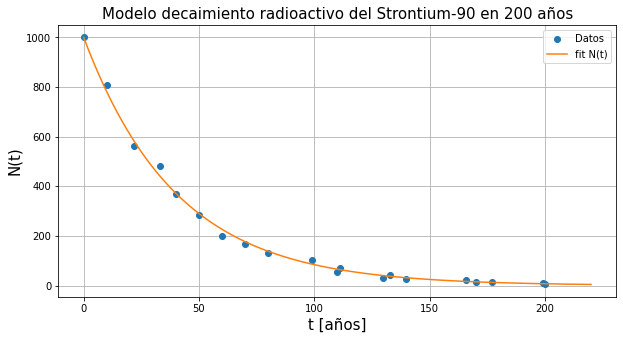

In [80]:
t=np.linspace(0,220,1000)

plt.figure(figsize=(10,5))
plt.title("Modelo decaimiento radioactivo del Strontium-90 en 200 años",fontsize=15)
plt.plot(df['t'],df['N(t)'],'o', label='Datos')
plt.plot(t,N(t,λ),label="fit N(t)")
plt.xlabel("t [años]",fontsize=15)
plt.ylabel("N(t)",fontsize=15)
plt.legend()
plt.grid()
plt.show()